# Imports

In [1]:
# data
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
# preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# model
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
# evaluation
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
dataset = fetch_california_housing(as_frame=True)

In [3]:
X, y = dataset['data'], dataset['target']

In [4]:
X.shape, y.shape

((20640, 8), (20640,))

In [5]:
def train_validate_test_split(X, y, *args, **kwargs):  
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, *args, **kwargs)    
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, *args, **kwargs)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y, random_state=42)

In [7]:
print([__.shape for __ in (X_train, X_val, X_test, y_train, y_val, y_test)])

[(11610, 8), (3870, 8), (5160, 8), (11610,), (3870,), (5160,)]


# Preview

In [8]:
print(dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Analysis the missing values and unique values

In [9]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16860,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43
12184,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39
19319,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98
10523,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70
12294,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93


In [10]:
y_train.head()

16860    1.442
12184    1.687
19319    1.621
10523    2.621
12294    0.956
Name: MedHouseVal, dtype: float64

In [11]:
def show_missing_info(data):
    return pd.DataFrame({
        'isnull': data.isnull().sum(),
        'nunique': data.nunique(),
        'dtypes': data.dtypes,
    })

In [12]:
show_missing_info(X_train)

,isnull,nunique,dtypes
MedInc,0,8313,float64
HouseAge,0,52,float64
AveRooms,0,11177,float64
AveBedrms,0,9042,float64
Population,0,3254,float64
AveOccup,0,10934,float64
Latitude,0,789,float64
Longitude,0,781,float64


All features are numerical and contain no missing values.

# Preprocessing

All X feature columns are numerical and contains no missing values, and y label are categorical, therefore no preprocessing is need.

# Model

In [13]:
model = RandomForestRegressor(n_estimators=100)

In [14]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
y_val_pred = model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)

In [16]:
print(f'Validation MAE: {val_mae:.6f}')

Validation MAE: 0.331321


# Evaluation 

In [17]:
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [18]:
print(f'Test MAE: {test_mae:.6f}')

Test MAE: 0.338151


In [19]:
print(f'y_test mean: {np.mean(y_test):.6f}, std: {np.std(y_test):.6f}')

y_test mean: 2.063186, std: 1.150312


Text(0.5, 0.98, 'y_test vs y_test_pred')

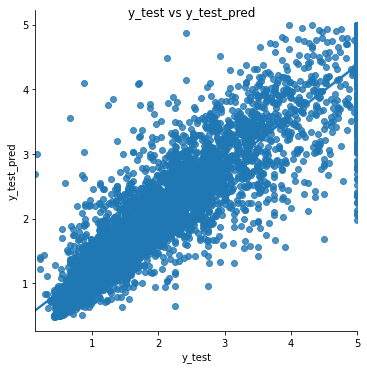

In [20]:
y_test_vs_pred = pd.concat([
    pd.Series(y_test, name='y_test'), 
    pd.Series(y_test_pred, name='y_test_pred', index=y_test.index),
], axis=1)
sns.lmplot(x='y_test', y='y_test_pred', data=y_test_vs_pred).\
    fig.suptitle('y_test vs y_test_pred')

In [21]:
y_test_vs_pred.corr()

,y_test,y_test_pred
y_test,1.000000,0.894578
y_test_pred,0.894578,1.000000


# Application

In [22]:
def application(idx=None):
    if idx is None:
        idx = np.random.randint(len(X_test))
    print('Collected new features as follows:')
    print(X_test.iloc[idx])
    print(f'\nModel forecasted as {model.predict(X_test.iloc[idx:idx+1])[0]:.6f}')
    print(f'\nActual data should be {y_test.iloc[idx]:.6f}')

In [23]:
application()

Collected new features as follows:
MedInc           2.852800
HouseAge        25.000000
AveRooms         3.897674
AveBedrms        1.036047
Population    1815.000000
AveOccup         2.110465
Latitude        34.170000
Longitude     -118.540000
Name: 4032, dtype: float64

Model forecasted as 2.551220

Actual data should be 4.250000
